# Naive Bayesian Models
By Joelle Bailey 800984146 for ECGR 4105 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

from sklearn.decomposition import PCA

from sklearn.datasets import load_breast_cancer

## Problem 1: Naive Bayes Classification 
IDs as Malignant or Benign and plots classification accuracy, precision, and recall 

In [2]:
# Setup and Data Processing
model = GaussianNB()
dataset = load_breast_cancer()

In [3]:
## 
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, train_size = 0.8)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train, Y_train)
expected = Y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.93      0.97        76

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  0]
 [ 5 71]]


## Problem 2: Logistic Regression with PCA feature extraction

In [4]:
# Set up

X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, train_size = 0.8)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model = LogisticRegression(random_state = 0)
K = np.arange(1, 30, 1)

accuracy = []
precision = []
recall = []

In [5]:
for i in K:
    pca = PCA(n_components = i, random_state = 0)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.fit_transform(X_test)
    
    model.fit(X_train_PCA, Y_train)
    expected = Y_test
    predicted = model.predict(X_test_PCA)
    
    accuracy.append(metrics.accuracy_score(expected, predicted))
    precision.append(metrics.precision_score(expected, predicted))
    recall.append(metrics.recall_score(expected, predicted))

Text(0.5, 1.0, 'Logistic Regression PCA Iterations Results')

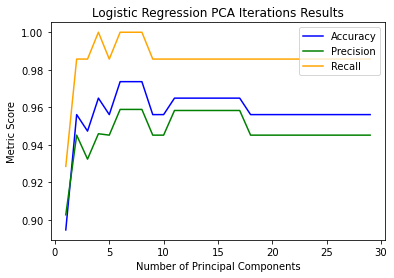

In [6]:
plt.plot(K, accuracy, color = 'blue', label = 'Accuracy')
plt.plot(K, precision, color = 'green', label = 'Precision')
plt.plot(K, recall, color = 'orange', label = 'Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Metric Score')
leg = plt.legend(loc='upper right')
plt.title('Logistic Regression PCA Iterations Results')

## Problem 3: Naive Bayes with PCA feature extraction

In [7]:
# Set up

X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, train_size = 0.8)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model = GaussianNB()
K = np.arange(1, 30, 1)

accuracy = []
precision = []
recall = []

In [8]:
for i in K:
    pca = PCA(n_components = i, random_state = 0)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.fit_transform(X_test)
    
    model.fit(X_train_PCA, Y_train)
    expected = Y_test
    predicted = model.predict(X_test_PCA)
    
    accuracy.append(metrics.accuracy_score(expected, predicted))
    precision.append(metrics.precision_score(expected, predicted))
    recall.append(metrics.recall_score(expected, predicted))

Text(0.5, 1.0, 'GaussianNB PCA Iterations Results')

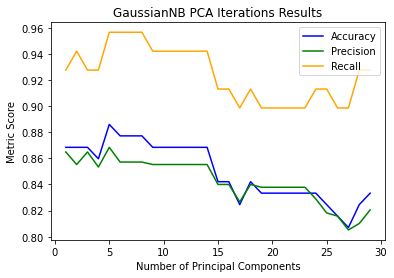

In [9]:
plt.plot(K, accuracy, color = 'blue', label = 'Accuracy')
plt.plot(K, precision, color = 'green', label = 'Precision')
plt.plot(K, recall, color = 'orange', label = 'Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Metric Score')
leg = plt.legend(loc='upper right')
plt.title('GaussianNB PCA Iterations Results')